<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/WhichCelebYouAre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import os
from numpy.linalg import norm
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
actorsName = []

files = open('/content/drive/MyDrive/DataSet/List of Actors.txt', 'r')

for f in files.readlines():
  if f is not None and f != '\n':
    actorsName.append(f.replace('\n',''))

print(actorsName)

['abhay_deol', 'adil_hussain', 'ajay_devgn', 'akshay_kumar', 'akshaye_khanna', 'amitabh_bachchan', 'amjad_khan', 'amol_palekar', 'amole_gupte', 'amrish_puri', 'anil_kapoor', 'annu_kapoor', 'anupam_kher', 'anushka_shetty', 'arshad_warsi', 'aruna_irani', 'ashish_vidyarthi', 'asrani', 'atul_kulkarni', 'ayushmann_khurrana', 'boman_irani', 'chiranjeevi', 'chunky_panday', 'danny_denzongpa', 'darsheel_safary', 'deepika_padukone', 'deepti_naval', 'dev_anand', 'dharmendra', 'dilip_kumar', 'dimple_kapadia', 'farhan_akhtar', 'farida_jalal', 'farooq_shaikh', 'girish_karnad', 'govinda', 'gulshan_grover', 'hrithik_roshan', 'huma_qureshi', 'irrfan_khan', 'jaspal_bhatti', 'jeetendra', 'jimmy_sheirgill', 'johnny_lever', 'kader_khan', 'kajol', 'kalki_koechlin', 'kamal_haasan', 'kangana_ranaut', 'kay_kay_menon', 'konkona_sen_sharma', 'kulbhushan_kharbanda', 'lara_dutta', 'madhavan', 'madhuri_dixit', 'mammootty', 'manoj_bajpayee', 'manoj_pahwa', 'mehmood', 'mita_vashisht', 'mithun_chakraborty', 'mohanlal'

In [5]:
#creating path to read images for every actor image folders

path = '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/'
pathfile = []

for i in actorsName:
  pathfile.append(path+i)
  
print(pathfile)

['/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/abhay_deol', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/adil_hussain', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/ajay_devgn', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/akshay_kumar', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/akshaye_khanna', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amitabh_bachchan', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amjad_khan', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amol_palekar', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amole_gupte', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amrish_puri', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bolly

In [6]:
#Redaing images from path using glob


img1 = glob.glob('/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/irrfan_khan/*.jpg')
len(img1)

50

<class 'numpy.ndarray'>


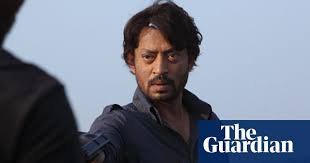

In [7]:
#read images using imread func 
img2 = cv2.imread(img1[5])
print(type(img2))
#print(img1)
import matplotlib.pyplot as plt
cv2_imshow(img2
           )

In [8]:

images_list = []
name = []
i = 0
for p in tqdm(pathfile):
  img_list = glob.glob(p+'/*.jpg')
  for img in img_list:
    images_list.append(img)
    name.append(actorsName[i])
  i = i+1


100%|██████████| 135/135 [00:49<00:00,  2.70it/s]


In [9]:
pickle.dump(images_list, open('/content/drive/My Drive/DataSet/images_list.pkl', 'wb'))

In [21]:
print(images_list[5])
print(name[5])

/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/adil_hussain/3bdaf0bc3b.jpg
adil_hussain


In [22]:
len(images_list)

6688

In [23]:
#Images resize

img2 = cv2.imread(images_list[5])
img2.shape
img2 = cv2.resize(img2, (224,224))
img2.shape

(224, 224, 3)

In [23]:
images_array = []
images_array

[]

In [ ]:
images_array = []

for img3 in tqdm(images_list):
  img3 = cv2.imread(img3)
  img3 = cv2.resize(img3, (224,224))
  images_array.append(img3)

print(images_array[3])

100%|██████████| 6688/6688 [26:07<00:00,  4.27it/s]

[[[ 55  65  95]
  [ 58  68  98]
  [ 62  72 102]
  ...
  [105 226 240]
  [100 223 237]
  [100 223 237]]

 [[ 47  57  87]
  [ 56  65  96]
  [ 63  73 103]
  ...
  [104 226 240]
  [102 225 239]
  [102 225 239]]

 [[ 50  60  90]
  [ 54  64  94]
  [ 58  68  98]
  ...
  [104 226 240]
  [103 226 240]
  [103 226 240]]

 ...

 [[ 64  89 128]
  [ 77 144 189]
  [ 64 161 215]
  ...
  [ 95 193 199]
  [ 96 194 200]
  [ 96 194 200]]

 [[ 66  92 129]
  [ 77 147 190]
  [ 66 165 216]
  ...
  [ 94 194 199]
  [ 96 196 201]
  [ 96 196 201]]

 [[ 59  89 123]
  [ 79 154 198]
  [ 62 163 215]
  ...
  [ 91 190 198]
  [ 96 194 199]
  [ 92 190 196]]]


In [24]:
#dimension changing of images to 4D array which s acceptabele by keras lib

images_array_dims = []
for img4 in tqdm(images_array):
  img4 = np.expand_dims(img4,axis = 0)
  images_array_dims.append(img4)

print(images_array_dims[2].shape)


0it [00:00, ?it/s]


IndexError: ignored

In [ ]:
outputfile = open('images_array_dims.pkl', 'wb')
pickle.dump(images_array_dims, outputfile)
outputfile.close()

In [ ]:
import os
os.listdir()

['.config', 'drive', 'images_array_dims.pkl', 'sample_data']

In [ ]:
from google.colab import files
files.download('images_array_dims.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import keras
from keras.applications.resnet import ResNet50 
from keras.applications.resnet import preprocess_input

from keras.layers import GlobalMaxPooling2D 


In [26]:
model = ResNet50(include_top = False, weights='imagenet')
model.trainable = False

model = keras.Sequential([model,GlobalMaxPooling2D()])


94781440/94765736 [==============================] - 1s 0us/step


In [27]:
#now predict the output for first photo, 
pred1 = model.predict(preprocess_input(images_array_dims[0]))
pred1.shape


IndexError: ignored

In [ ]:
pred1

array([[1.7345965 , 7.3371496 , 1.197293  , ..., 2.6937442 , 0.44821393,
        2.8665588 ]], dtype=float32)

In [ ]:
#flatten this data to only single list like [], 
pred1 = pred1.flatten()
pred1.shape

(2048,)

In [ ]:
#!pip install linalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for linalg: filename=linalg-1.0.4-py3-none-any.whl size=6293 sha256=a283d32dff36d2d8a9b751be26de186295914b2931dfcbe71beebb3ed71e5187
  Stored in directory: /root/.cache/pip/wheels/95/b7/4f/80270f2a339ca90d7abee59235fba6650748e505fc990206f9
Successfully built linalg


In [28]:
#we need to normalised the data to reduce computtion time, so here we uses norm fuction of linear algebra package
from numpy.linalg import norm
pred1/norm(pred1)


NameError: ignored

In [ ]:
#function making to perform above task for every images data in images_array_dims

#feature_list to hold features

feature_list = []

def feature_extraction(img_array):
  img_array = preprocess_input(img_array)
  img_array = model.predict(img_array)
  img_array = img_array.flatten()
  img_array = img_array/norm(img_array)
  feature_list.append(img_array)
  


In [ ]:
#main function to call feature extraction

for img5 in tqdm(images_array_dims):
  feature_extraction(img5)

print(len(feature_list))

100%|██████████| 6688/6688 [27:07<00:00,  4.11it/s]

6691


In [ ]:
outputfile = open('feature_list.pkl', 'wb')
pickle.dump(feature_list, outputfile)

In [ ]:
#files.download('feature_list.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
feature_list[0]

array([0.00506203, 0.02141184, 0.00349403, ..., 0.00786109, 0.00130801,
       0.00836541], dtype=float32)

In [ ]:
len(name)

6688

In [ ]:
name.append('')
name.append('')
name.append('')
len(name)

6691

**Implementing knn model for finding nearest neighbour**

In [21]:
import sklearn
from sklearn.neighbors import NearestNeighbors

In [12]:
features = pickle.load(open('/content/drive/My Drive/DataSet/feature_list.pkl', 'rb'))

In [13]:
type(features[0].tolist())


list

In [14]:
features_list2 = []
for f in tqdm(features):
  f = f.tolist()
  features_list2.append(f)

100%|██████████| 6691/6691 [00:01<00:00, 5434.22it/s]


In [15]:
pickle.dump(features_list2, open('/content/drive/My Drive/features_list2.pkl', 'wb'))

In [43]:
nn = NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors= 6)
nn.fit(features_list2)


NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [44]:
neighbors_dist,indices = nn.kneighbors([features_list2[100]])

In [45]:
indices

array([[ 100, 3196, 4908, 4022, 4018, 5567]])

In [46]:
neighbors_dist

array([[5.16191366e-08, 6.81959240e-01, 6.85923009e-01, 7.01643804e-01,
        7.02880923e-01, 7.09729706e-01]])

In [47]:
ind =  indices.flatten().tolist()
print((ind))

[100, 3196, 4908, 4022, 4018, 5567]


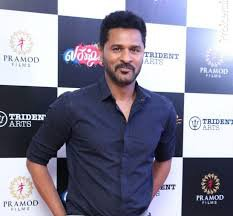

In [42]:
img6 = cv2.imread(images_list[4018])
cv2_imshow(img6)


In [25]:
from google.colab import files
u = files.upload()

Saving 0c96111fed.jpg to 0c96111fed.jpg


In [18]:
features_list2 = pickle.load(open('/content/drive/My Drive/features_list2.pkl', 'rb'))

In [6]:
#!pip install streamlit

In [25]:
%%writefile main.py
import streamlit as st
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import os
from numpy.linalg import norm
from google.colab.patches import cv2_imshow
from PIL import Image
import sklearn 

#Resnet Model building
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
model = ResNet50(include_top = False,weights= 'imagenet' )
model.trainable = False


#CNN Model building
import keras
from keras.layers import GlobalMaxPooling2D
model = keras.Sequential(
  [model,
  GlobalMaxPooling2D()]
)


#this list contains the 2048 features for every training images
features_list2 = pickle.load(open('/content/drive/My Drive/features_list2.pkl', 'rb'))
images_list = pickle.load(open('/content/drive/My Drive/DataSet/images_list.pkl', 'rb'))


#Nearaest Neigbors modeel building to predict our neighbors
from sklearn.neighbors import NearestNeighbors
NNmodel = NearestNeighbors(n_neighbors = 6, metric= 'euclidean', algorithm='brute') 
NNmodel.fit(features_list2)

#finding nearest neighbors
def NearestNeighbors_func(predicting_img_features):
  return NNmodel.neighbors([predicting_img_features])


#feature extraction for uploaded images
def feature_extraction(uploaded_img):
  uploaded_img = np.expand_dims(uploaded_img, axis=0)
  uploaded_img = preprocess_input(uploaded_img)
  result = model.predict(uploaded_img)
  result = result.flatten()
  result = result/norm(result)
  return result




st.title('Which Celebrity Do You Look Alike ? ')
st.subheader('Use our Face Recognition model to find your celebrity look alike')
uploaded_file = st.file_uploader('Upload you photo to find : ')
if uploaded_file is not None:
  st.image(uploaded_file)
  uploaded_file = Image.open(uploaded_file)
  uploaded_file = uploaded_file.resize((224,224))
  uploaded_file = np.array(uploaded_file)
  extracted_features = feature_extraction(uploaded_file)
  neighbors_dist,indices = NNmodel.kneighbors([extracted_features])
  indices = indices.flatten().tolist()
  img = images_list[indices[0]]
  img = cv2.imread(img)
  st.image(img)
  img = images_list[indices[1]]
  img = cv2.imread(img)
  st.image(img)
  img = images_list[indices[2]]
  img = cv2.imread(img)
  st.image(img)
  



Overwriting main.py


In [26]:
!streamlit run main.py & npx localtunnel --port 8501

2022-07-06 06:40:44.111 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.9.227:8501

npx: installed 22 in 3.029s
your url is: https://thick-hoops-sin-34-125-9-227.loca.lt
2022-07-06 06:41:15.121552: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-06 06:44:04.234 5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f9da0037440> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes

In [12]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 5.9 MB/s 
     |████████████████████████████████| 181 kB 64.3 MB/s 
     |████████████████████████████████| 164 kB 56.4 MB/s 
     |████████████████████████████████| 78 kB 9.1 MB/s 
     |████████████████████████████████| 232 kB 43.8 MB/s 
     |████████████████████████████████| 111 kB 57.2 MB/s 
     |████████████████████████████████| 4.3 MB 46.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 133 kB 70.9 MB/s 
     |████████████████████████████████| 132 kB 66.6 MB/s 
     |████████████████████████████████| 423 kB 67.5 MB/s 
     |████████████████████████████████| 793 kB 48.5 MB/s 
     |████████████████████████████████| 381 kB 65.2 MB/s 
     |████████████████████████████████| 51 kB 9.7 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=0a15e2fa385